
**Linear Regression**


Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.


Linear Regression can be further classified into two types

Simple and Multiple Linear Regression. It is the simplest form of Linear Regression where we fit a straight line to the data.


**Simple Linear Regression - Model Assumptions**

The Linear Regression Model is based on several assumptions which are listed below:-

i.	Linear relationship

ii.	Multivariate normality

iii.	No or little multicollinearity

iv.	No auto-correlation

v.	Homoscedasticity


### i.	Linear relationship


The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.


### ii.	Multivariate normality

The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.


### iii.	No or little multicollinearity

It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.


### iv.	No auto-correlation

Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.


### v.	Homoscedasticity

Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.

**Simple Linear Regression**

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

This linear relationship can be modelled by mathematical equation of the form:-

                 
                 Y = β0   + β1*X    -------------   (1)
                 

In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.



For simplicity, we can compare the above equation with the basic line equation of the form:-

                   y = ax + b       ----------------- (2)

We can see that

slope of the line is given by, a =  β1,  and

intercept of the line by b =  β0.


In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

**Ordinary Least Square Method**

The TV and Sales data are given by X and y respectively. We can draw a scatter plot between X and y which shows the relationship between them.



Now, our task is to find a line which best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called **Regression line**.


We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a **Cost function**.


In [40]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

In [2]:
# Reading the Dataset
df = pd.read_csv("/content/advertising.csv")

In [3]:
# Dropping Radio and Newsletter columns
df = df.drop(["Radio", "Newspaper"], axis =1)

In [4]:
# View the dimensions of df

df.shape

(200, 2)

In [5]:
# View the top 5 rows of dataframe
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [6]:
# View dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
# View descriptive statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [25]:
x = df[['TV']].values

In [13]:
y= df['Sales'].values

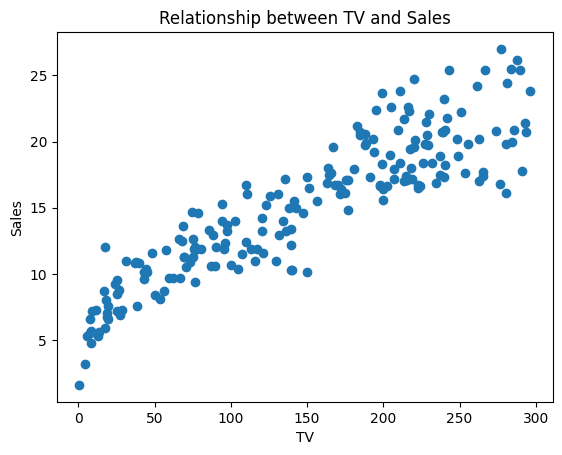

In [14]:
# Plot scatter plot between X and y

plt.scatter(x, y)
plt.title("Relationship between TV and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

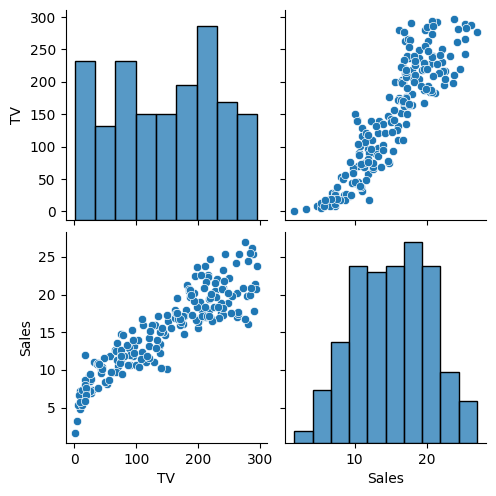

In [15]:
# plot a pairplot also for df

sns.pairplot(df)

In [16]:
# Print the dimensions of X and y

print(x.shape)
print(y.shape)

(200,)
(200,)


## Reshaping X and y

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

E.g, If you have an array of shape (3,2) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 6 rows, hence, (6,1)

In [17]:
# Reshape X and y

x= x.reshape(-1, 1)
y= y.reshape(-1, 1)

In [18]:
# Print the dimensions of X and y after reshaping
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


# Performing Linear Regression

In [26]:
# Split X and y into training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

In [27]:
# print shapes of X_train,y_train, X_test, y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [28]:
# Fit the linear model

# Instantiate the linear regression object lm

lm = LinearRegression()

In [29]:
y_actual = lm.fit(x_train, y_train)

In [30]:
# Predict on the test data
y_pred = lm.predict(x_test)

In [34]:
# Compute model slope and intercept

a = lm.coef_
b = np.array([lm.intercept_])

# also print a and b

print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)


Estimated model slope, a: [[0.05566076]]
Estimated model intercept, b: [[6.90403247]]


In [38]:
predicted_sales = lm.predict(x[:5])

In [41]:
# Calculate and print Root Mean Square Error(RMSE)

mse = mean_squared_error(y[:5], predicted_sales)
rmse = np.sqrt(mse)

In [42]:
print("RMSE value:", rmse)

RMSE value: 2.2844722760171496


In [44]:
# Calculate and print r2_score

r2score = r2_score(y[:5], predicted_sales)
print("R2 Score value:", r2score)

R2 Score value: 0.7041086326999719
